# Live Updating and Interactive Plots

## 1 Plotting Live data

In our work, We are often required to **plot Live** data. 

* **psutil**: Cross-platform lib for process and system monitoring in Python 

   https://github.com/giampaolo/psutil

```text
python -m pip install psutil
```
### 1.1 Python Script


* ```matplotlib.pyplot.ion()```  

 Turn the **interactive** mode on.
 
 https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ion.html?highlight=ion


* ```matplotlib.pyplot.clf()```

  Clear the current figure.

  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.clf.html


In [ ]:
%%file ./code/python/cpu_monitor.py
import psutil
from time import sleep, strftime
import matplotlib.pyplot as plt

pltLength = 100

#Turn the interactive mode on.
plt.ion()

# index 
x = [i for i in range(pltLength)]
# value
y = [None for i in range(pltLength)]
i = 0

def write_cpu(cpu):
    with open("cpu.csv", "a") as log:
        log.write("{0},{1}\n".format(strftime("%Y-%m-%d %H:%M:%S"), str(cpu)))

def graph(cpu):
    global i
    if i < pltLength:
        y[i] = cpu
        i += 1
    else:
        # Once enough data is captured, append the newest data point and delete the oldest
        y.append(cpu)
        del y[0]
        
    # clear the current figure.
    plt.clf()
    
    plt.xlim(0, pltLength)
    plt.plot(x, y, "b-o")
    plt.draw()
    plt.pause(0.1)


while True:
    cpu = psutil.cpu_percent()
    write_cpu(cpu)
    graph(cpu)
    sleep(1)

### 1.2 Plotting Live data  in Jupyter notebook

#### 1.2.1 The  Dynamically Plotting with IPython.display

IPython.display
 
```python
from IPython.display import clear_output
clear_output(wait=True)
```
The problem： screen **flicker** in figure dynamic display


In [ ]:
import psutil
from time import sleep, strftime
import matplotlib.pyplot as plt
# IPython.display 
from IPython.display import clear_output

fig = plt.figure(figsize=(6,3))
plt.ion()

pltLength = 100
x = [i for i in range(pltLength)]
y = [None for i in range(pltLength)]
i = 0

def write_cpu(cpu):
    with open("cpu.csv", "a") as log:
        log.write("{0},{1}\n".format(strftime("%Y-%m-%d %H:%M:%S"), str(cpu)))

def graph(cpu):
    global i
    if i < pltLength:
        y[i] = cpu
        i += 1
    else:
        # Once enough data is captured, append the newest data point and delete the oldest
        y.append(cpu)
        del y[0]

    plt.clf()
    plt.ylim(0, 80)    
    plt.xlim(0, pltLength)
    plt.plot(x, y, "b-o")
    plt.draw()
    # clear_output(wait=True)
    clear_output(wait=True)
    plt.pause(0.05)

while True:
    cpu = psutil.cpu_percent()
    write_cpu(cpu)
    graph(cpu)
    sleep(1)

#### 1.2.2 The  Dynamically Plotting with  `%matplotlib notebook`

Using `%matplotlib notebook` to avoid the problem of screen flicker in figure dynamic displaying.

* `%matplotlib notebook` will lead to `interactive plots` embedded within the notebook


##### 1.2.2.1  The direct way

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from time import sleep, strftime
import psutil

fig = plt.figure(figsize=(7,3))
plt.ion()
fig.show()
fig.canvas.draw()

pltLength=20
x = [i for i in range(pltLength)]
y = [None for i in range(pltLength)]
i = 0

def write_cpu(cpu):
    with open("cpu.csv", "a") as log:
        log.write("{0},{1}\n".format(strftime("%Y-%m-%d %H:%M:%S"), str(cpu)))

def graph(cpu):
    global i
    if i < pltLength:
        y[i] = cpu
        i += 1
    else:
        # Once enough data is captured, append the newest data point and delete the oldest
        y.append(cpu)
        del y[0]

    plt.clf()
    plt.xlim(0, pltLength)
    plt.plot(x, y, "b-o")
    plt.show()
    fig.canvas.draw()   # draw

while True:
    cpu = psutil.cpu_percent()
    write_cpu(cpu)
    graph(cpu)
    sleep(1)

##### 1.2.2.2  The Dynamically Plotting with matplotlib.animation

*  matplotlib.animation


In [ ]:
%%file ./code/python/cpu_monitor_animation.py
import time
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import psutil

def GetTagData(tag):
    tagfuncs={"CPU_PERCENT": psutil.cpu_percent(),
               "MEM_PERCENT": psutil.virtual_memory().percent,
               "BAT_PERCENT": psutil.sensors_battery().percent} 
    value= tagfuncs[tag]
    return value        
            
tag="CPU_PERCENT"
y = deque()

columns = ()
col_labels = ['Tag', 'Unit', 'Value']
table_vals = [[tag,"%",""]]

fig, ax = plt.subplots()
ax.set_title("The Simple Monitor:"+tag)
ln, = plt.plot([], [], 'b-o')
str_cursecond=str(time.localtime(time.time()).tm_sec)   
time_text = ax.text(0.5, 80, "")

tbl = ax.table(cellText=table_vals,
               colLabels=col_labels,
               colWidths=[0.2] * 3,
               cellLoc='center',
               loc='best')

def init():
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 100)
    return ln,

def update(frames):
    # blocking io -> unresponsive_monitor
    value =GetTagData(tag)
    if len(y) < 10:
        y.append(value)
    else:
        y.popleft()
        y.append(value)

    str_curtime=time.strftime("%F %H:%M:%S", time.localtime(time.time()))
    time_text.set_text("Time:"+str_curtime)
    
    table_vals = [[tag,"%",str(value)]]
    tbl = ax.table(cellText=table_vals,
               colLabels=col_labels,
               colWidths=[0.2] *3,
               cellLoc='center',
               loc='best')

    ln.set_xdata(np.arange(len(y)))
    ln.set_ydata(np.array(y))
    return ln,time_text, tbl

ani = FuncAnimation(fig, update,init_func=init, blit=True,interval=1000)
plt.show()

## 2 pywidgets and interactive plots

* **ipywidgets**

   Widgets are `eventful` python objects that have a **representation** in the browser, often as a control like a slider, textbox, etc.

   https://ipywidgets.readthedocs.io/en/stable/

```text
python -m pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```

### 2.1 The Simple Example



<IPython.core.display.Javascript object>


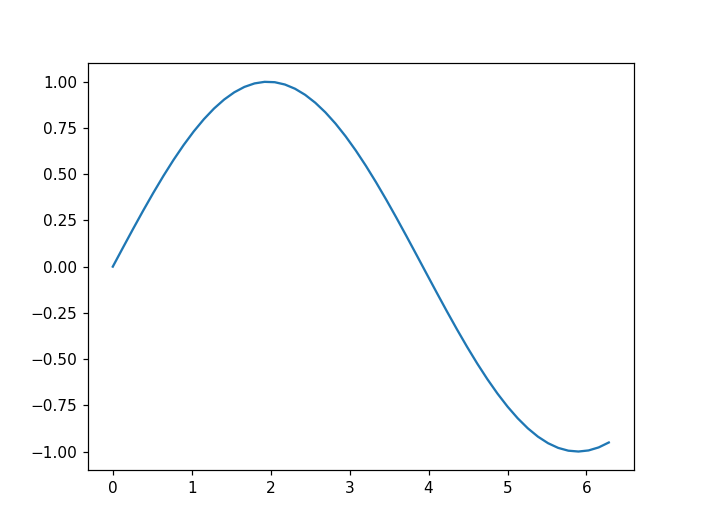

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.update(w=1.0)>

In [2]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update)

### 2.2 Proportional Integral Derivative (PID) Control

https://en.wikipedia.org/wiki/PID_controller

A proportional–integral–derivative controller (PID controller. or three-term controller) is a control loop feedback mechanism widely used in industrial control systems and a variety of other applications requiring continuously modulated control. A PID controller continuously calculates an error value {\displaystyle e(t)} e(t) as the difference between a desired setpoint (SP) and a measured process variable (PV) and applies a correction based on proportional, integral, and derivative terms (denoted P, I, and D respectively), hence the name.

![](./img/PID.png)

* https://apmonitor.com/pdc/index.php/Main/ProportionalIntegralDerivative

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as wg
from IPython.display import display

n = 100 # time points to plot
tf = 20.0 # final time
SP_start = 2.0 # time of set point change

def process(y,t,u):
    Kp = 4.0
    taup = 3.0
    thetap = 1.0
    if t<(thetap+SP_start):
        dydt = 0.0  # time delay
    else:
        dydt = (1.0/taup) * (-y + Kp * u)
    return dydt

def pidPlot(Kc,tauI,tauD):
    t = np.linspace(0,tf,n) # create time vector
    P= np.zeros(n)          # initialize proportional term
    I = np.zeros(n)         # initialize integral term
    D = np.zeros(n)         # initialize derivative term
    e = np.zeros(n)         # initialize error
    OP = np.zeros(n)        # initialize controller output
    PV = np.zeros(n)        # initialize process variable
    SP = np.zeros(n)        # initialize setpoint
    SP_step = int(SP_start/(tf/(n-1))+1) # setpoint start
    SP[0:SP_step] = 0.0     # define setpoint
    SP[SP_step:n] = 4.0     # step up
    y0 = 0.0                # initial condition
    # loop through all time steps
    for i in range(1,n):
        # simulate process for one time step
        ts = [t[i-1],t[i]]         # time interval
        y = odeint(process,y0,ts,args=(OP[i-1],))  # compute next step
        y0 = y[1]                  # record new initial condition
        # calculate new OP with PID
        PV[i] = y[1]               # record PV
        e[i] = SP[i] - PV[i]       # calculate error = SP - PV
        dt = t[i] - t[i-1]         # calculate time step
        P[i] = Kc * e[i]           # calculate proportional term
        I[i] = I[i-1] + (Kc/tauI) * e[i] * dt  # calculate integral term
        D[i] = -Kc * tauD * (PV[i]-PV[i-1])/dt # calculate derivative term
        OP[i] = P[i] + I[i] + D[i] # calculate new controller output
        
    # plot PID response
    plt.figure(1,figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(t,SP,'k-',linewidth=2,label='Setpoint (SP)')
    plt.plot(t,PV,'r:',linewidth=2,label='Process Variable (PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,2)
    plt.plot(t,P,'g.-',linewidth=2,label=r'Proportional = $K_c \; e(t)$')
    plt.plot(t,I,'b-',linewidth=2,label=r'Integral = $\frac{K_c}{\tau_I} \int_{i=0}^{n_t} e(t) \; dt $')
    plt.plot(t,D,'r--',linewidth=2,label=r'Derivative = $-K_c \tau_D \frac{d(PV)}{dt}$')    
    plt.legend(loc='best')
    plt.subplot(2,2,3)
    plt.plot(t,e,'m--',linewidth=2,label='Error (e=SP-PV)')
    plt.legend(loc='best')
    plt.subplot(2,2,4)
    plt.plot(t,OP,'b--',linewidth=2,label='Controller Output (OP)')
    plt.legend(loc='best')
    plt.xlabel('time')
    
Kc_slide = wg.FloatSlider(value=0.1,min=-0.2,max=1.0,step=0.05)
tauI_slide = wg.FloatSlider(value=4.0,min=0.01,max=5.0,step=0.1)
tauD_slide = wg.FloatSlider(value=0.0,min=0.0,max=1.0,step=0.1)
wg.interact(pidPlot, Kc=Kc_slide, tauI=tauI_slide, tauD=tauD_slide)